<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [54]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-12-15 08:58:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  36.1MB/s    in 1.0s    

2024-12-15 08:58:32 (36.1 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [55]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [56]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('ggplot') # optional: for ggplot-like style

## Demo: How to run an sql query


In [57]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [58]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [59]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [60]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql 
FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


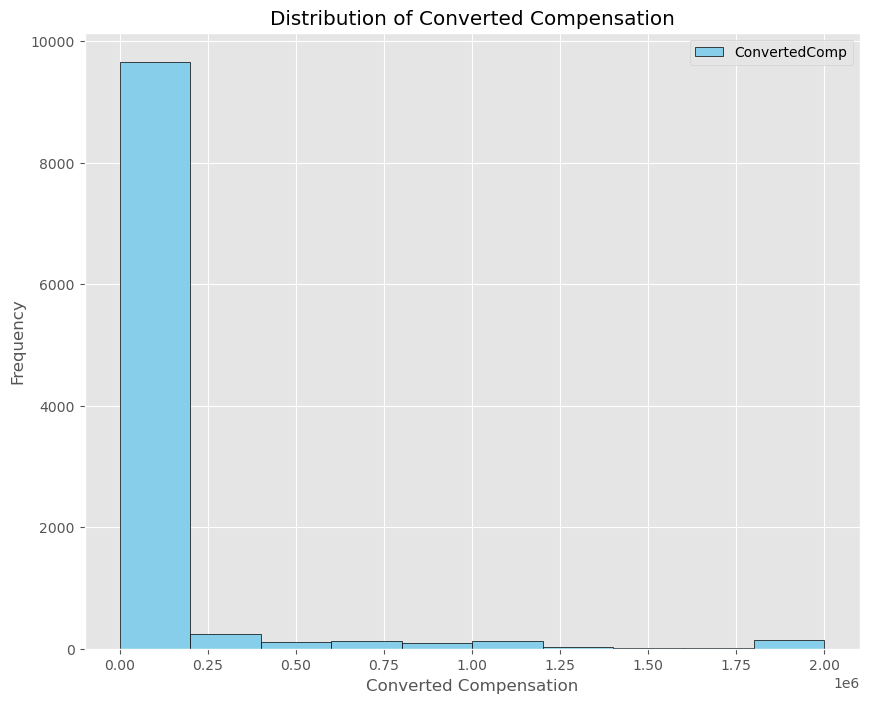

In [61]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY, conn)
df.plot(kind='hist', figsize=(10, 8), color='skyblue', edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()



### Box Plots


Plot a box plot of `Age.`


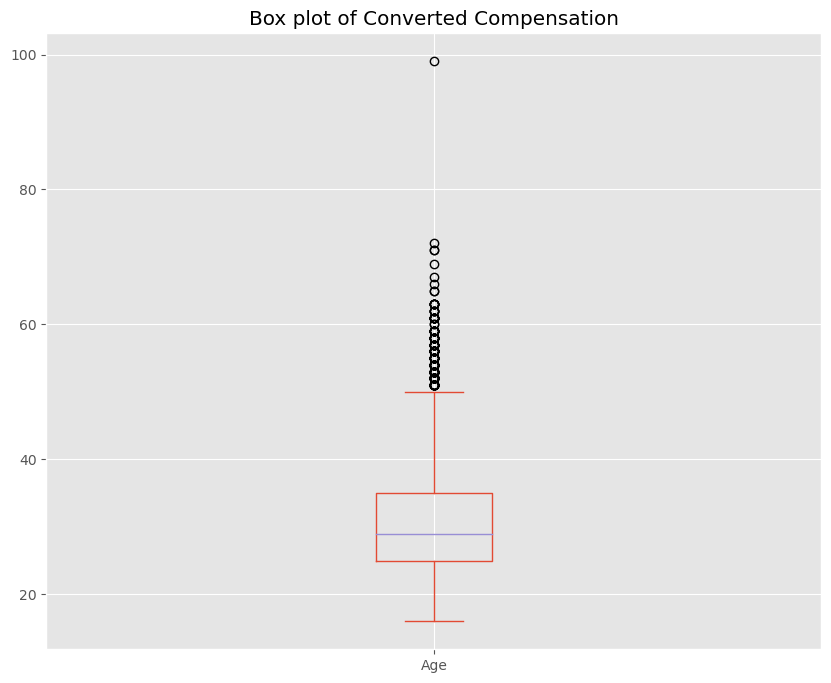

In [62]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='box', figsize=(10, 8))
#OR: sns.boxplot(x=df['Age'], data=df)
plt.title('Box plot of Converted Compensation')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


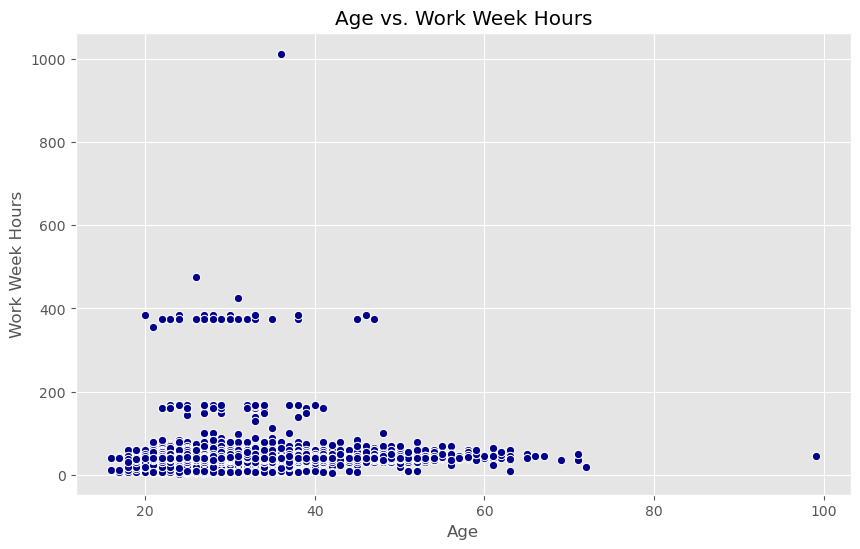

In [63]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df=pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'], data=df, color='darkblue')
plt.title('Age vs. Work Week Hours')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


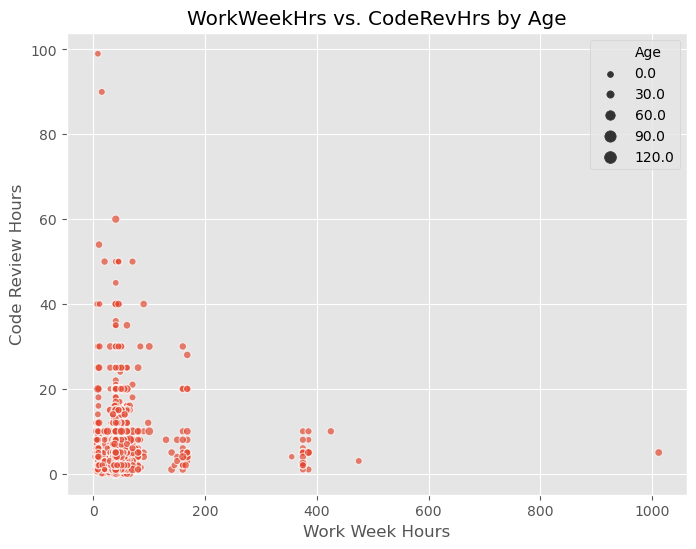

In [64]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df=pd.read_sql_query(QUERY, conn)

# Create a bubble plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=df, alpha=0.7)
#OR: plt.scatter(x=df['WorkWeekHrs'], y=df['CodeRevHrs'], s=df['Age'])
plt.title('WorkWeekHrs vs. CodeRevHrs by Age')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')

plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [65]:
# Display columns in the 'DatabaseDesireNextYear' table
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df=pd.read_sql_query(QUERY, conn)
df.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


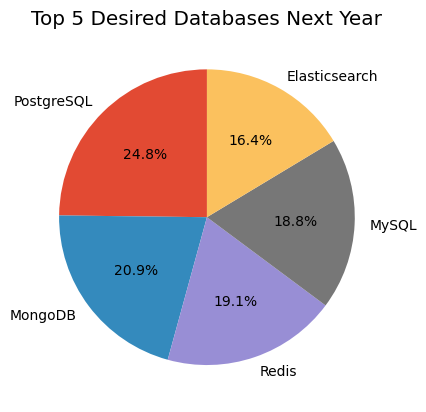

In [66]:
# your code goes here

# Query the top 5 databases that respondents wish to learn next year.
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count desc 
LIMIT 5
"""
df=pd.read_sql_query(QUERY, conn)
labels = df['DatabaseDesireNextYear']

#plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)
plt.pie(x=df['count'], labels=labels, autopct='%1.1f%%', startangle=90) # autopct='%1.1f%%: format the percentage labels displayed on the slices of a pie chart
plt.title('Top 5 Desired Databases Next Year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


      WorkWeekHrs  CodeRevHrs
Age                          
30.0         40.0         5.0
31.0          8.0         3.0
32.0         40.0         2.0
33.0         40.0         2.0
34.0         40.0         2.0
35.0         38.0         2.0


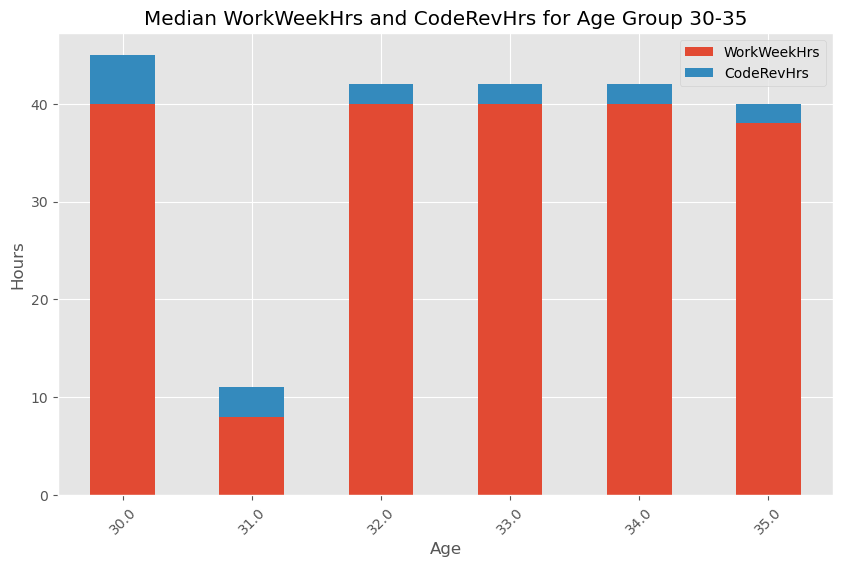

In [67]:
# your code goes here

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master 
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
"""
# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Group data by Age and calculate median values
df_grouped = df.groupby('Age').median()
print(df_grouped)

# Create the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.ylabel('Hours')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


      ConvertedComp
Age                
45.0        72522.0
46.0       118000.0
47.0       103000.0
48.0        25980.0
49.0       110509.0
50.0       115000.0
51.0        89212.0
52.0       135000.0
53.0       105000.0
54.0            NaN
55.0       150000.0
56.0            NaN
57.0        75431.0
58.0      1000000.0
59.0        75000.0
60.0       150000.0


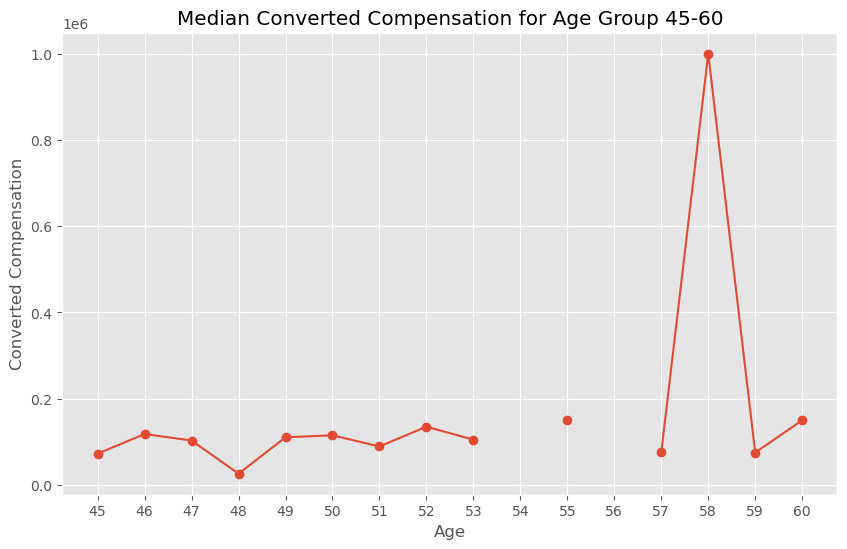

In [96]:
# your code goes here


QUERY = """
SELECT ConvertedComp, Age
FROM master 
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
"""
# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Group data by Age and calculate median values
df_grouped = df.groupby('Age').median()
print(df_grouped)

# Create the stacked bar chart
df_grouped.plot(kind='line', figsize=(10,6),marker='o', legend=False)

plt.title('Median Converted Compensation for Age Group 45-60')
plt.xlabel('Age')
plt.xticks(range(45, 61)) # show every age on the x-axis
plt.ylabel('Converted Compensation')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [99]:
# enter your code here
# Display columns 'MainBranch'
QUERY = """
SELECT MainBranch, COUNT(*) AS count
FROM master
GROUP BY MainBranch
"""
df=pd.read_sql_query(QUERY, conn)
df

,MainBranch,count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


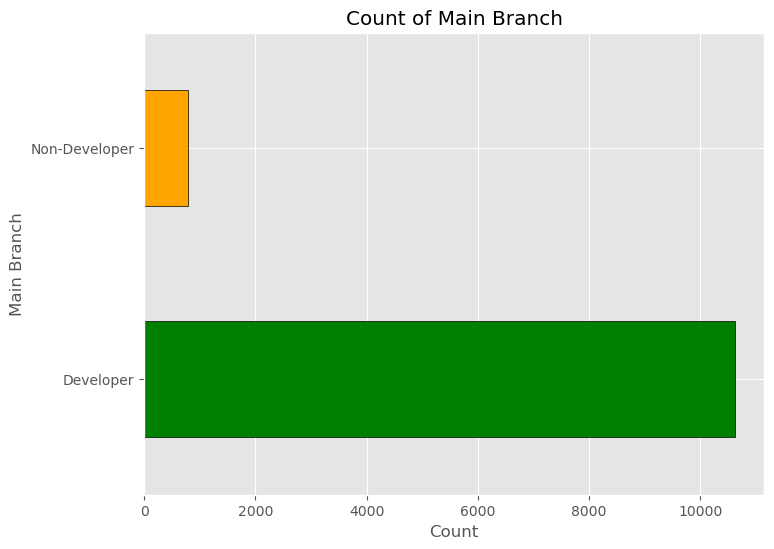

In [113]:
# your code goes here

# Create a horizontal bar chart using column `MainBranch`
colors = ['green', 'orange']
df.plot(kind='barh', x='MainBranch', y='count', figsize=(8,6), color = colors, edgecolor='black', legend=False)

plt.title('Count of Main Branch')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Main Branch', fontsize=12)
# Set the y-tick labels to the MainBranch values
ticks = df.index
labels = ['Developer', 'Non-Developer']
plt.yticks(ticks,labels)
                                              
plt.show()


Close the database connection.


In [114]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
